### <b>Linear Discriminant Analysis (LDA) - Supervised learning</b>

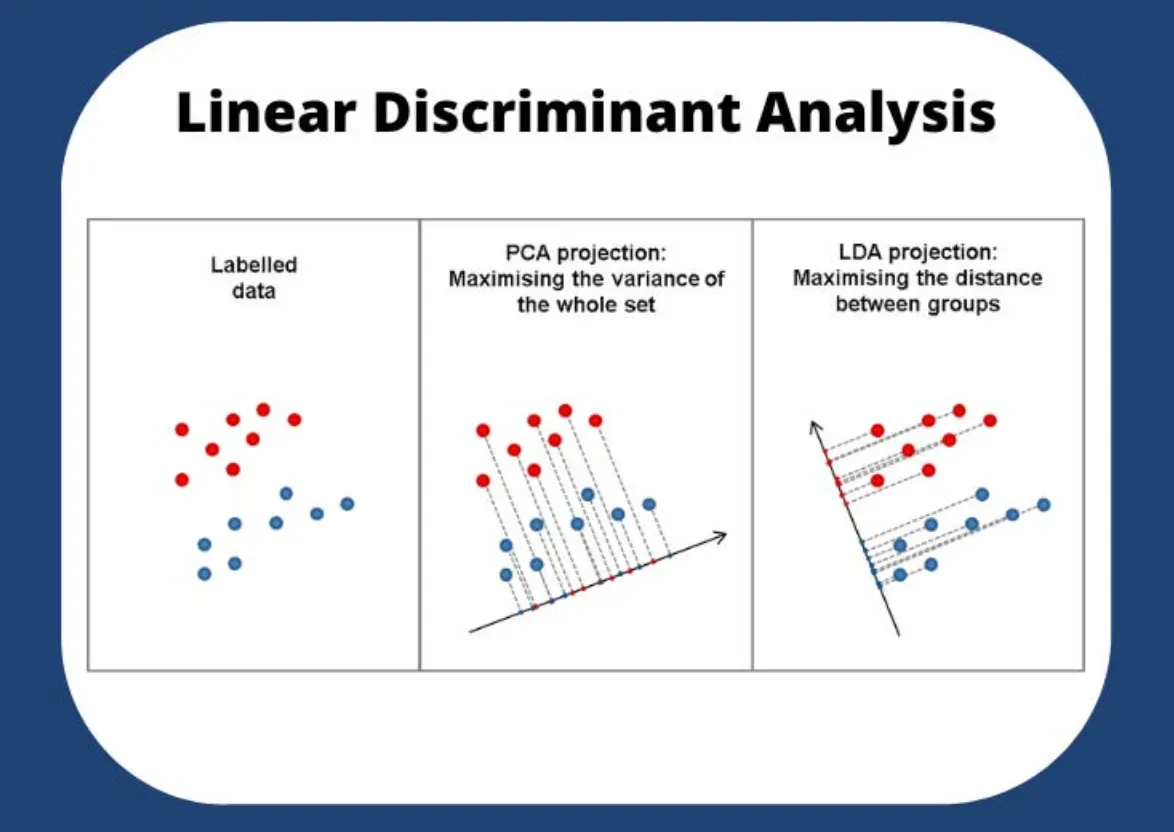
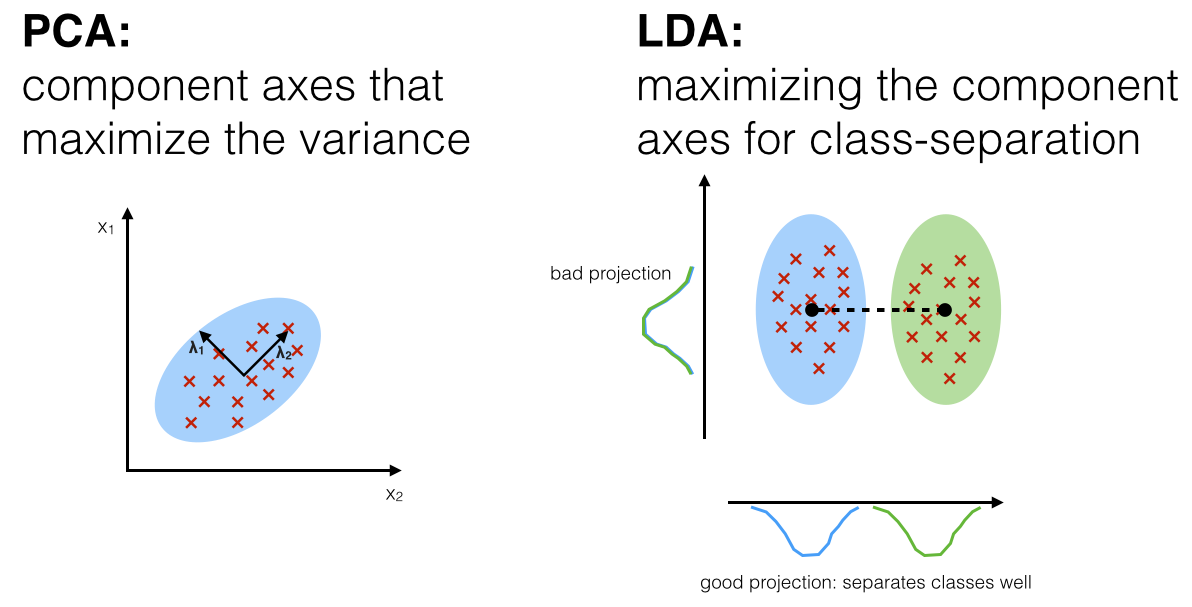
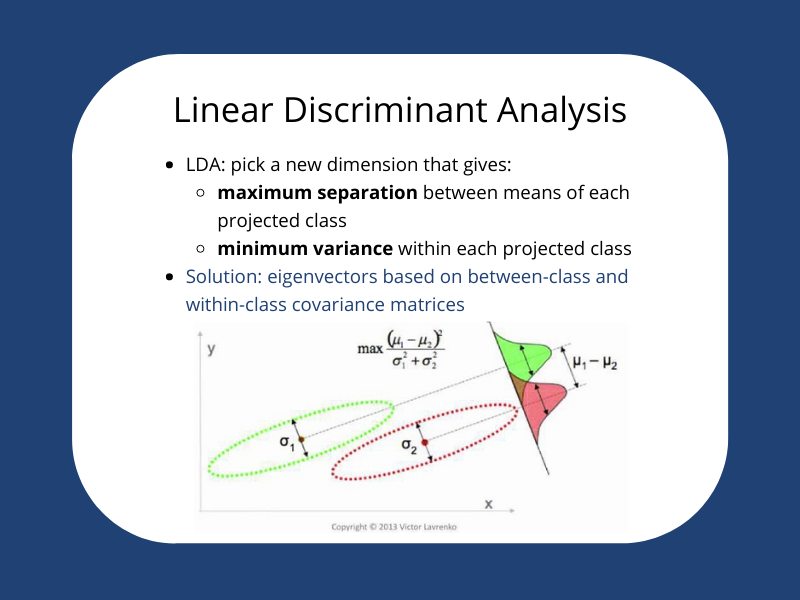
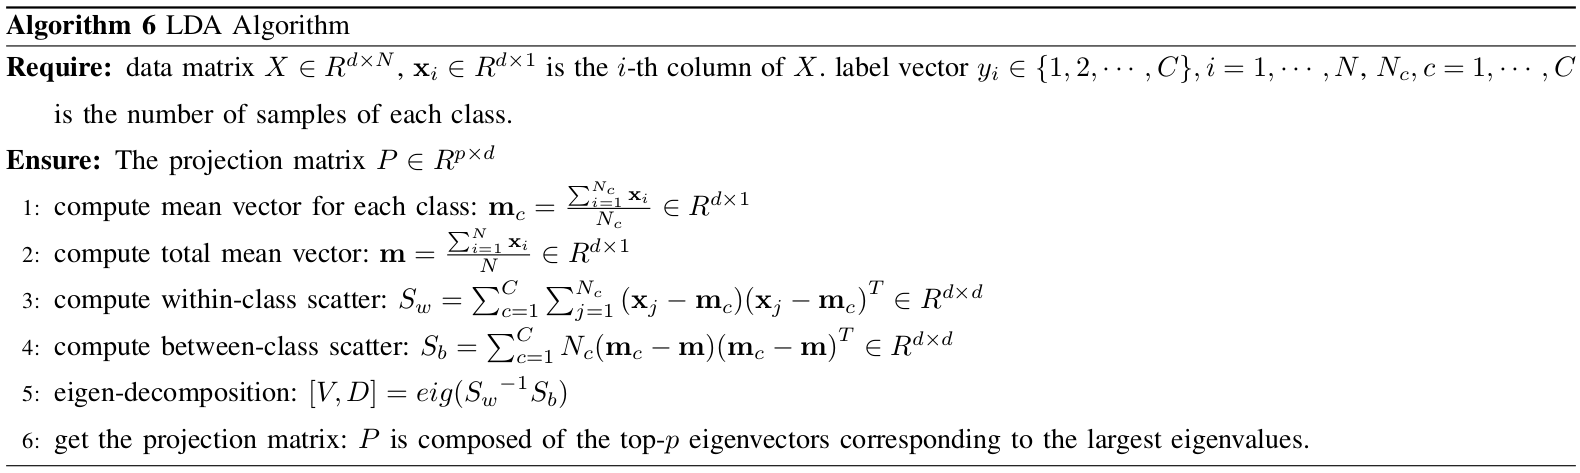

### <b>1. Loading/importing libraries</b>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### <b>2. Data preprocessing</b>

In [9]:
dataset = pd.read_csv("Wine.csv")

print(f"Dataset: \n{dataset}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Dataset: 
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06     

In [13]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-1.60544374 -0.30546995 -0.40044603 ...  0.86181819  0.51572523
  -1.23696796]
 [ 1.49435135 -0.6843695   0.33978082 ...  1.16071282  0.31110551
   2.89801926]
 [-1.14710828 -0.76014941  0.11771277 ...  0.39212663  0.06263869
  -0.91174425]
 ...
 [ 0.11934497 -0.24863502  3.07862015 ...  0.73372049  0.86650191
   0.26525586]
 [ 1.67527324 -0.5991171   1.15403035 ... -1.65743652 -0.94584426
  -0.26129682]
 [-1.58132082 -0.23916253  0.26575814 ...  0.17863047  0.20879564
  -0.19934944]]

X_test: 
[[ 2.64082481e-01  2.62879365e-01 -6.73439463e-02  6.38690298e-02
   1.35555419e+00 -1.05440987e+00 -1.37866744e+00  1.28565056e+00
  -2.97881824e-01  1.65536118e+00 -1.52933882e+00 -1.44277788e+00
   2.96229549e-01]
 [-4.23420708e-01 -9.21181715e-01 -1.80687704e+00 -3.83214179e-01
  -8.33910186e-01 -1.38084496e+00 -6.92897539e-01 -6.13376089e-01
  -4.92609754e-01 -1.14377168e+00  3.49427402e-01  2.38027031e-01
  -5.64838952e-01]
 [ 1.14456902e+00 -5.99117101e-01 -9.92627505e-01 -1.1

In [15]:
lda = LDA(n_components = 2)
lda.fit(X_train, y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-0.25529819 -2.60631219]
 [-4.18048125  4.69102132]
 [ 0.45796866 -2.98795333]
 [-2.82927428  2.24478473]
 [-3.80833038  4.16362883]
 [-0.71452176 -2.8846012 ]
 [-2.75226897  2.61826954]
 [-1.02781103 -2.88060935]
 [ 3.97749258  0.51918494]
 [ 0.37864457 -1.08615231]
 [-1.67924084 -2.42629222]
 [-2.25671711 -1.13406474]
 [-1.18519261 -2.67800627]
 [ 6.13099862  1.27835055]
 [ 5.03088975  1.21574291]
 [-1.66478779 -2.1722641 ]
 [-3.21495359 -1.87711747]
 [ 5.07170054 -0.49655496]
 [ 5.82303854  1.0354445 ]
 [-3.34698537  3.23871051]
 [-2.29280591 -2.90357995]
 [ 3.02327709  1.46402269]
 [ 4.10805123  0.43169434]
 [-0.66095888 -3.56301916]
 [-1.70892534  0.74308571]
 [ 5.65843353  2.74794098]
 [-3.22477737  1.75977488]
 [-3.62518321  1.62816222]
 [ 1.63623949 -1.03223855]
 [-0.7436144  -2.65476743]
 [-2.90148072 -2.09713402]
 [ 4.9118324   0.61833221]
 [-1.00060871 -2.77210408]
 [-1.70767025 -2.71556827]
 [ 5.2287745  -0.2069038 ]
 [-0.38621194 -3.26290474]
 [ 3.78026972 -0.0

### <b>3. Fitting/creating Logistic Regression classifier</b>

In [16]:
logistic_regression_classifier = LogisticRegression(random_state = 0)
logistic_regression_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### <b>4. Evaluating the performance of Logistic Regression model</b>

In [20]:
y_predicted = logistic_regression_classifier.predict(X_test)

print(f"y_test: \n{y_test}\n")
print(f"y_predicted: \n{y_predicted}\n")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"Confusion matrix: \n{confusion_matrix_result}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"Accuray score: \n{accuracy_score_result}\n")

y_test: 
[3 2 1 2 3 3 1 1 3 1 3 3 1 2 3 2 3 2 3 1 2 2 2 1 2 2 1 2 3 1 2 3 1 2 2 1 1
 3 1 1 2 2 1 1 2]

y_predicted: 
[3 2 1 2 3 3 1 1 3 1 3 3 1 2 2 2 3 2 3 1 2 2 2 1 2 2 1 2 3 1 2 3 1 2 2 1 1
 3 1 1 2 1 1 1 2]

Confusion matrix: 
[[16  0  0]
 [ 1 16  0]
 [ 0  1 11]]

Accuray score: 
0.9555555555555556



##### <b>4.1 Visualizing the training results</b>

C:\Users\PanCh\AppData\Local\Temp\ipykernel_13716\2230849978.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


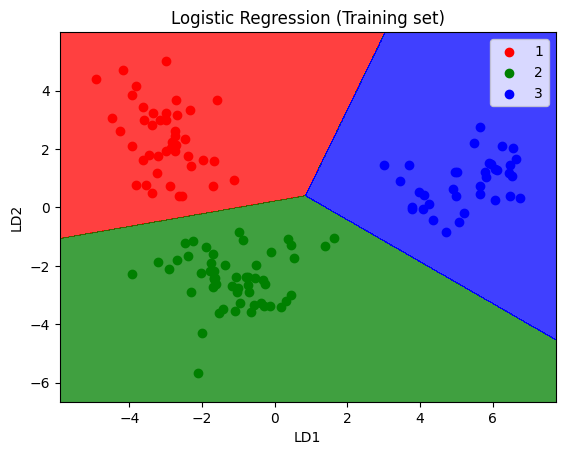

In [21]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic_regression_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

#### <b>4.2 Visualizing the test set results</b>

C:\Users\PanCh\AppData\Local\Temp\ipykernel_13716\1439031712.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


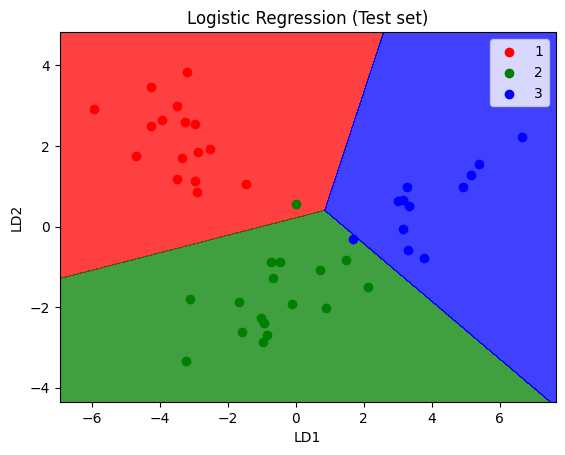

In [22]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic_regression_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()